# Generate manuscript figures

In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pd
import verde as vd
import pygmt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

## Load custom matplotlib configuration

In [2]:
plt.style.use(Path(".") / "matplotlib.rc")

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Define results directory

In [3]:
results_dir = Path("..") / "results"
ground_results_dir = results_dir / "ground_survey"
airborne_results_dir = results_dir / "airborne_survey"

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
figs_dir = Path("..") / "manuscript" / "figs"

## Ground and airborne synthetic surveys

In [5]:
survey_ground = pd.read_csv(ground_results_dir / "survey.csv")
survey_airborne = pd.read_csv(airborne_results_dir / "survey.csv")

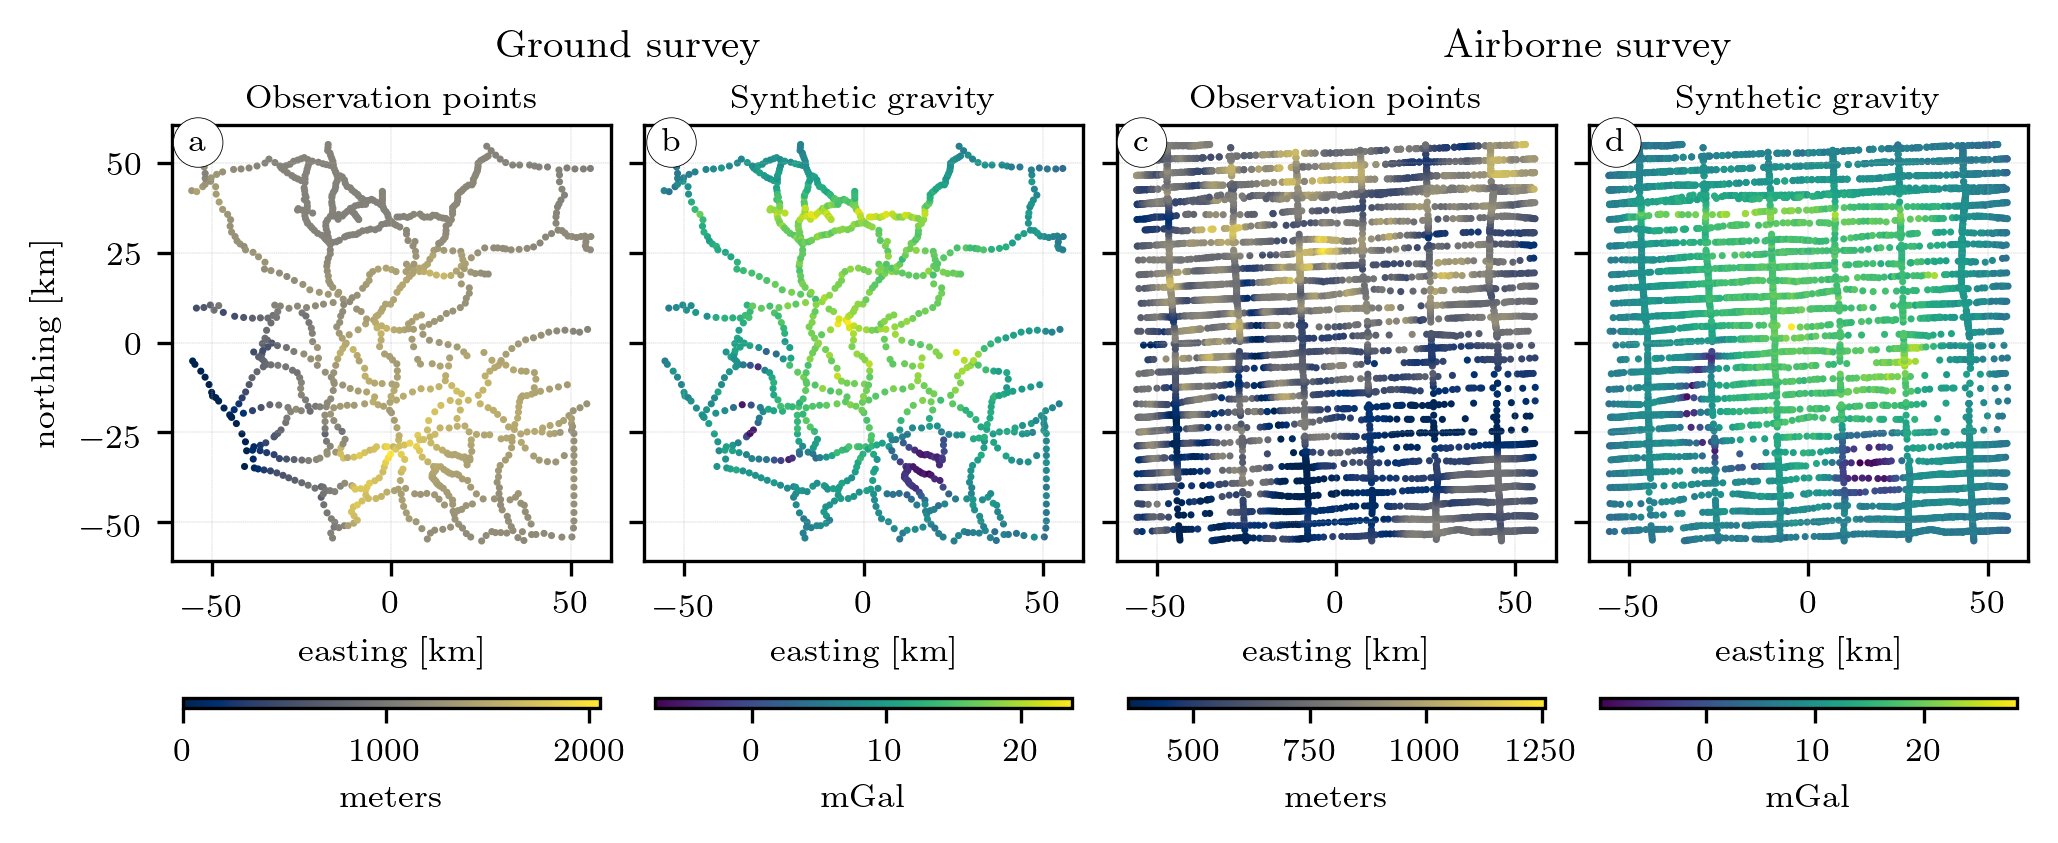

In [6]:
# Define useful parameters
figsize = (6.66, 2.9)
cbar_args = dict(
    shrink=0.95,
    pad=0.16,
    aspect=40,
    orientation="horizontal",
)
size = 0.5
labels = "a b c d".split()
coords_scale = 1e-3

# Initialize figure and axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, sharey=True, figsize=figsize)

tmp = ax1.scatter(
    survey_ground.easting * coords_scale,
    survey_ground.northing * coords_scale,
    c=survey_ground.height,
    cmap="cividis",
    s=size,
)
clb = plt.colorbar(tmp, ax=ax1, **cbar_args)
clb.set_label("meters")

tmp = ax2.scatter(
    survey_ground.easting * coords_scale,
    survey_ground.northing * coords_scale,
    c=survey_ground.g_z,
    cmap="viridis",
    s=size,
)
clb = plt.colorbar(tmp, ax=ax2, **cbar_args)
clb.set_label("mGal")

tmp = ax3.scatter(
    survey_airborne.easting * coords_scale,
    survey_airborne.northing * coords_scale,
    c=survey_airborne.height,
    cmap="cividis",
    s=size,
)
clb = plt.colorbar(tmp, ax=ax3, **cbar_args)
clb.set_label("meters")


tmp = ax4.scatter(
    survey_airborne.easting * coords_scale,
    survey_airborne.northing * coords_scale,
    c=survey_airborne.g_z,
    cmap="viridis",
    s=size,
)
clb = plt.colorbar(tmp, ax=ax4, **cbar_args)
clb.set_label("mGal")

ax1.set_ylabel("northing [km]")
for ax, label in zip((ax1, ax2, ax3, ax4), labels):
    ax.set_aspect("equal")
    ax.set_xlabel("easting [km]")
    ax.annotate(
        label,
        xy=(0.04, 0.94),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )
    ax.grid(linestyle="--", linewidth=0.1)

title_args = dict(
    pad=4,
    fontsize="medium",
)
ax1.set_title("Observation points", **title_args)
ax2.set_title("Synthetic gravity", **title_args)
ax3.set_title("Observation points", **title_args)
ax4.set_title("Synthetic gravity", **title_args)

plt.figtext(0.3, 0.9, "Ground survey", horizontalalignment="center", fontsize="large")
plt.figtext(
    0.78, 0.9, "Airborne survey", horizontalalignment="center", fontsize="large"
)

plt.tight_layout(w_pad=0, pad=0)
plt.savefig(
    figs_dir / "synthetic-survey-layouts.pdf",
    bbox_inches="tight",
)

## Target grid

In [7]:
target = xr.open_dataarray(results_dir / "target.nc")

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)


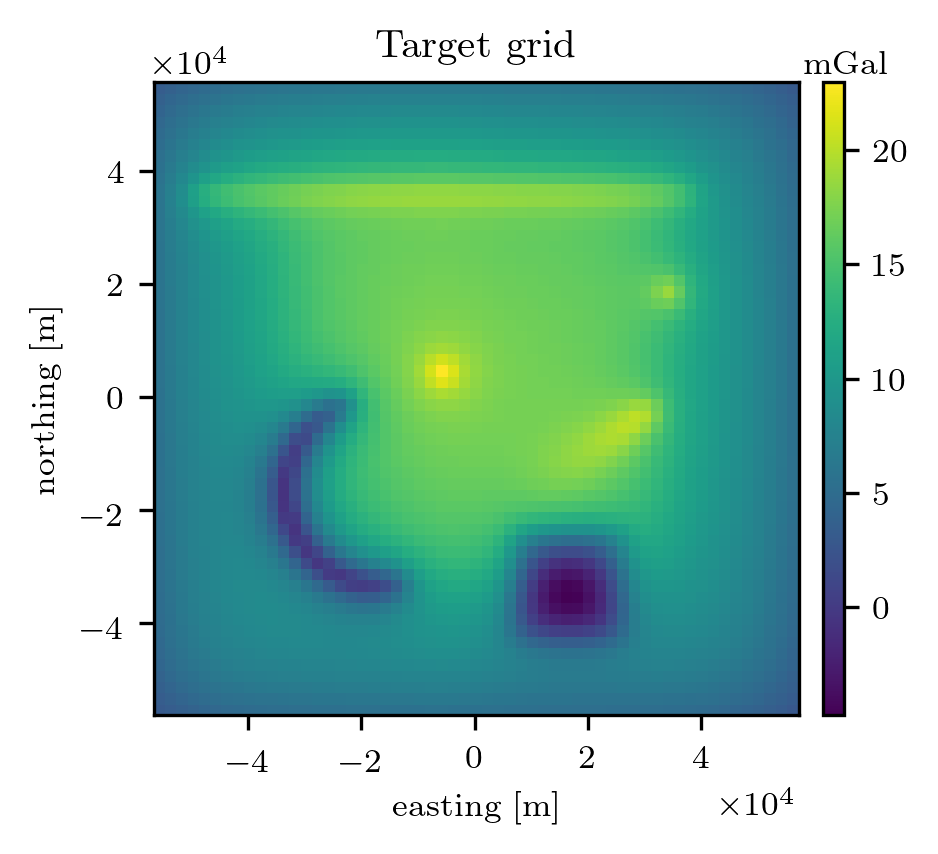

In [8]:
width = 3.33
figsize = (width, width * 0.85)
fig, ax = plt.subplots(figsize=figsize)

tmp = target.plot.pcolormesh(
    ax=ax, add_colorbar=False, cmap="viridis", center=False, rasterized=True
)
ax.set_aspect("equal")
ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
ax.set_xlabel(ax.get_xlabel() + " [m]")
ax.set_ylabel(ax.get_ylabel() + " [m]")
clb = plt.colorbar(tmp, ax=ax, shrink=1, orientation="vertical", pad=0.03, aspect=30)
clb.set_label("mGal", labelpad=-15, y=1.05, rotation=0)

ax.set_title("Target grid")
plt.tight_layout()
plt.savefig(
    figs_dir / "target-grid.pdf",
    bbox_inches="tight",
)
plt.show()

## Gridding ground survey

In [9]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
layout_names = ["Sources below data", "Block-averaged sources", "Regular grid sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(ground_results_dir / "best_predictions-{}.nc".format(layout))
    )

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


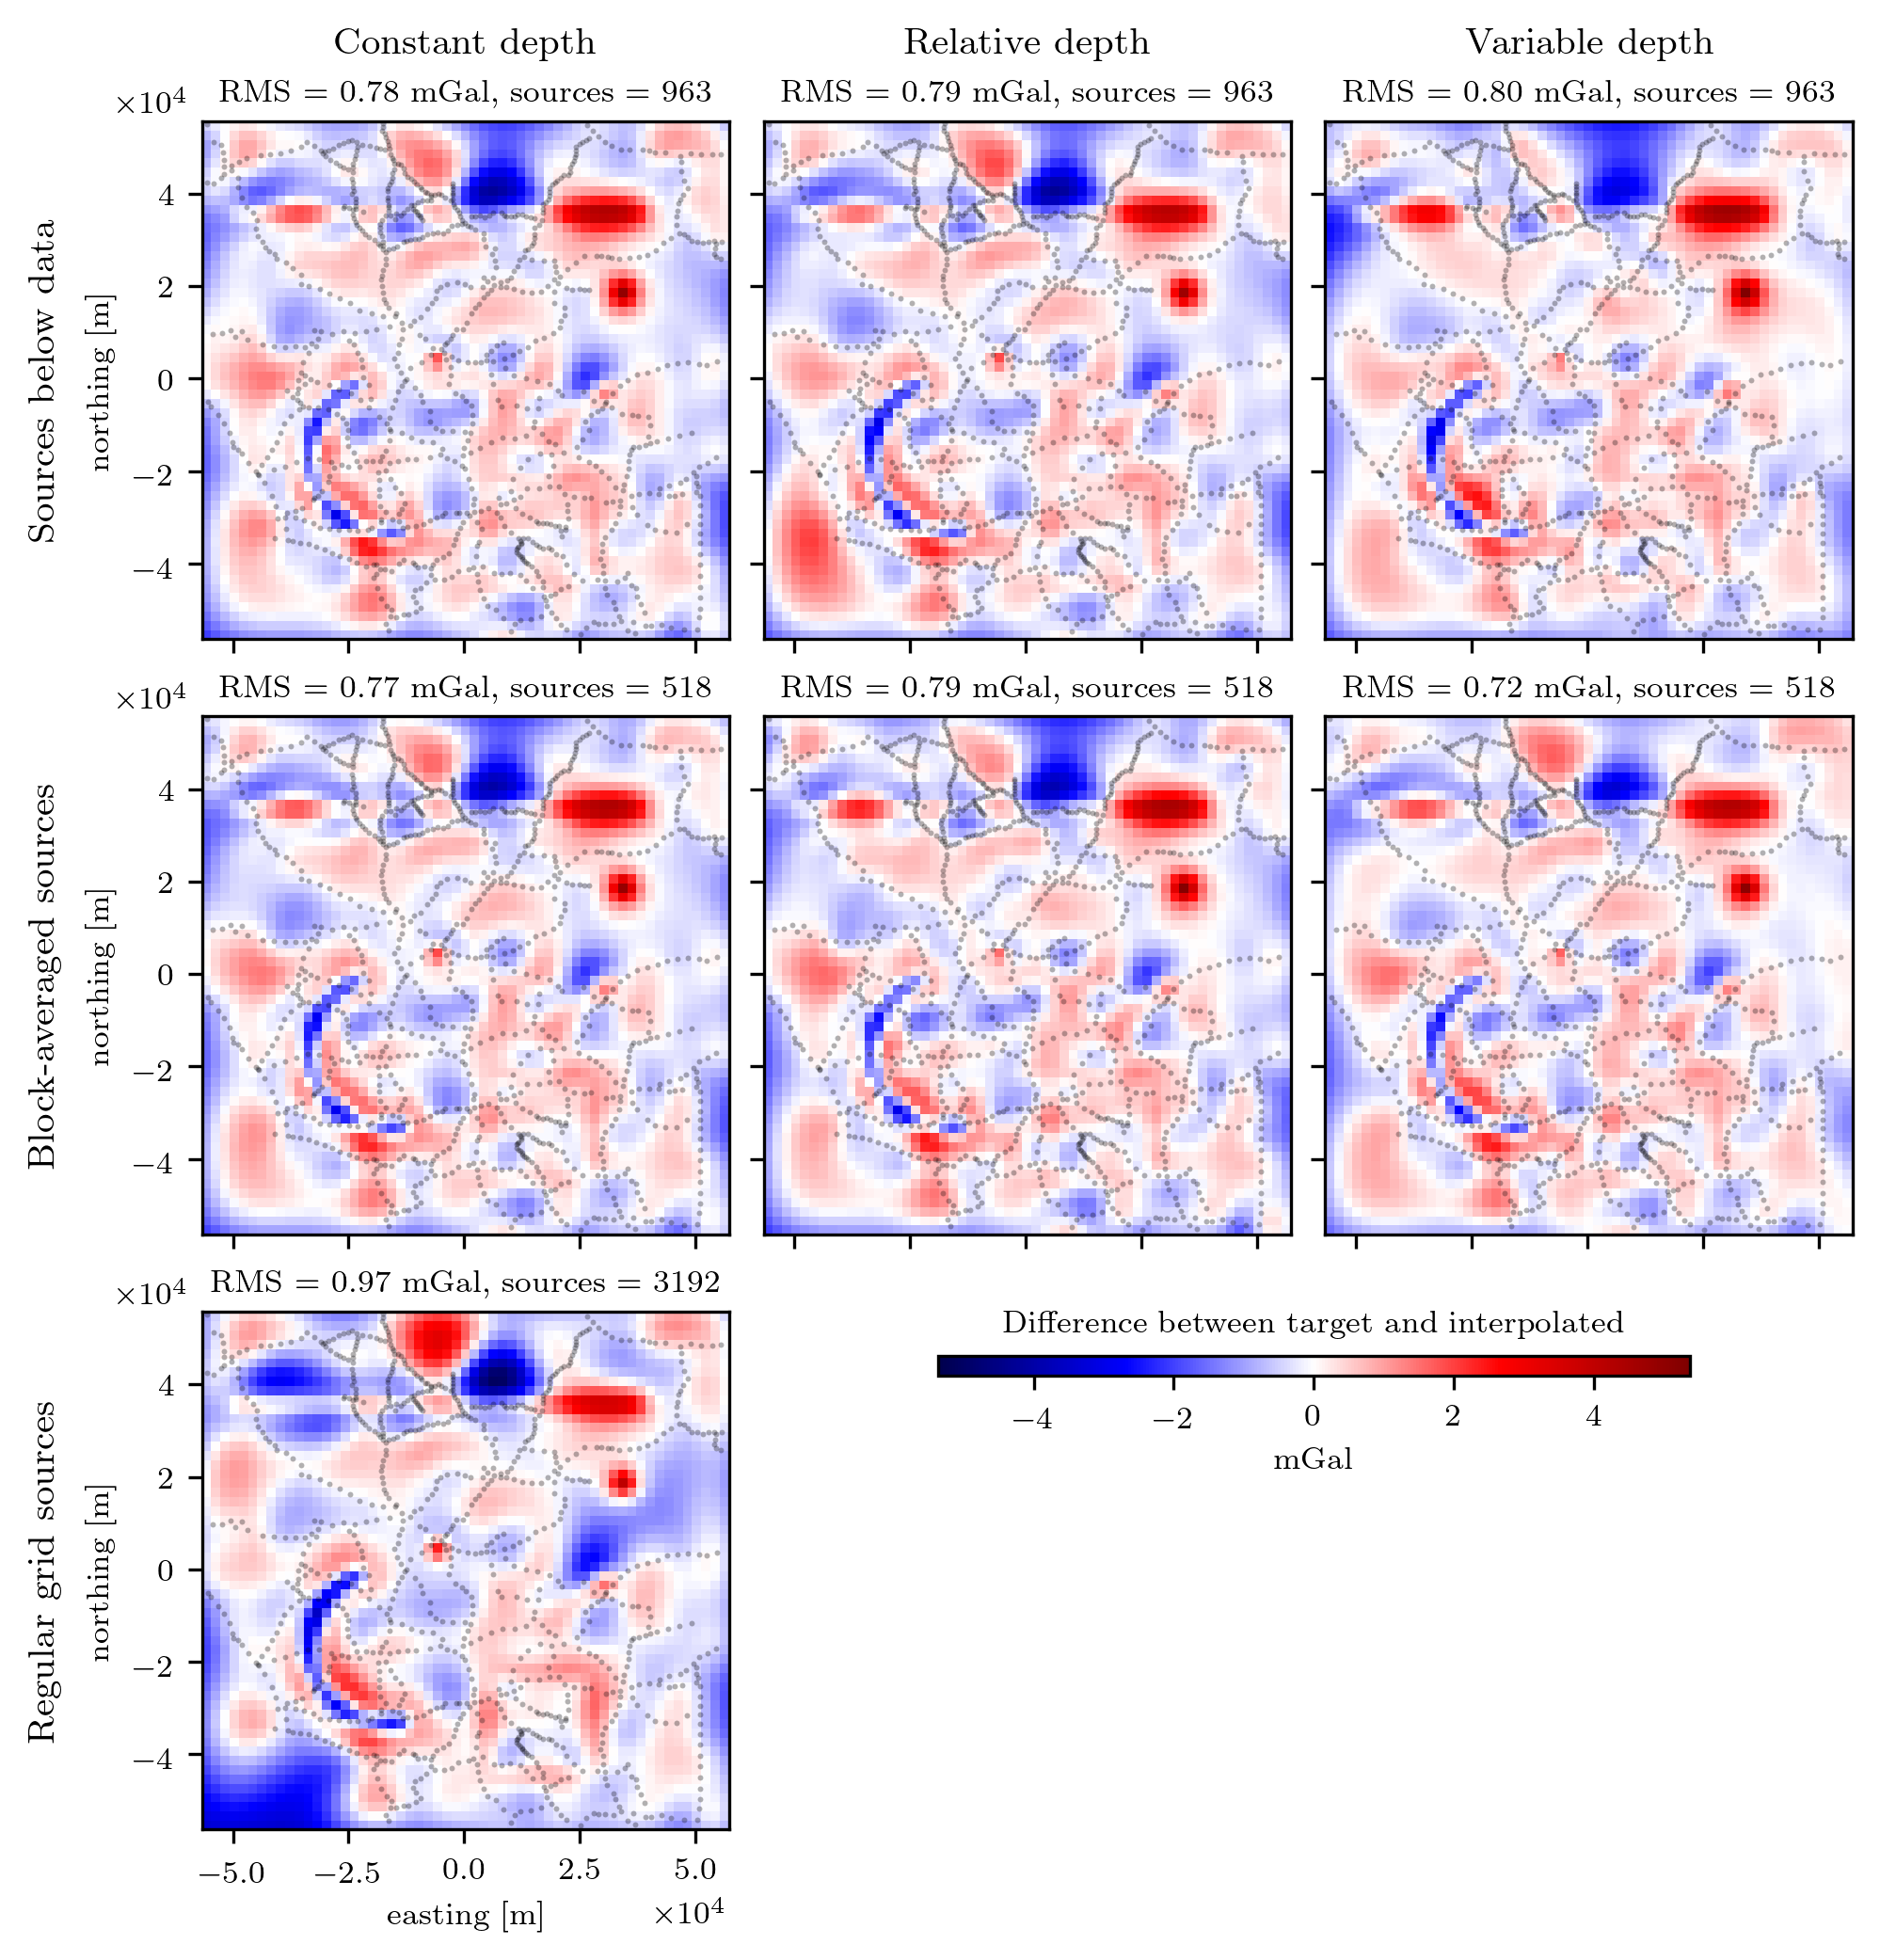

In [10]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.9), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(
            survey_ground.easting,
            survey_ground.northing,
            s=2,
            alpha=0.3,
            color="k",
            linewidths=0,
        )
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.16)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS = {:.2f} mGal, sources = {}".format(
                prediction.rms, prediction.n_points
            ),
            fontsize="medium",
            horizontalalignment="center",
            pad=5,
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.13,
                # r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                depth_type.replace("_", " ").capitalize(),
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.33,
                0.5,
                # r"\textbf{{" + layout_names[i] + r"}}",
                layout_names[i],
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
# cbar_ax = fig.add_axes([0.39, 0.075, 0.01, 0.25])
# fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=f"Difference between\ntarget and interpolation\n[{field_units}]")
cbar_ax = fig.add_axes([0.49, 0.3, 0.4, 0.01])
cbl = fig.colorbar(tmp, cax=cbar_ax, orientation="horizontal", label=f"{field_units}")
cbl.ax.set_title("Difference between target and interpolated", fontsize="medium")

plt.tight_layout(w_pad=0)
plt.savefig(
    figs_dir / "ground_survey_differences.pdf",
    bbox_inches="tight",
)
plt.show()

## Gridding airborne survey

In [11]:
layouts = ["source_below_data", "block_averaged_sources", "grid_sources"]
layout_names = ["Sources below data", "Block-averaged sources", "Regular grid sources"]
field_units = "mGal"

best_predictions = []
for layout in layouts:
    best_predictions.append(
        xr.open_dataset(airborne_results_dir / "best_predictions-{}.nc".format(layout))
    )

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


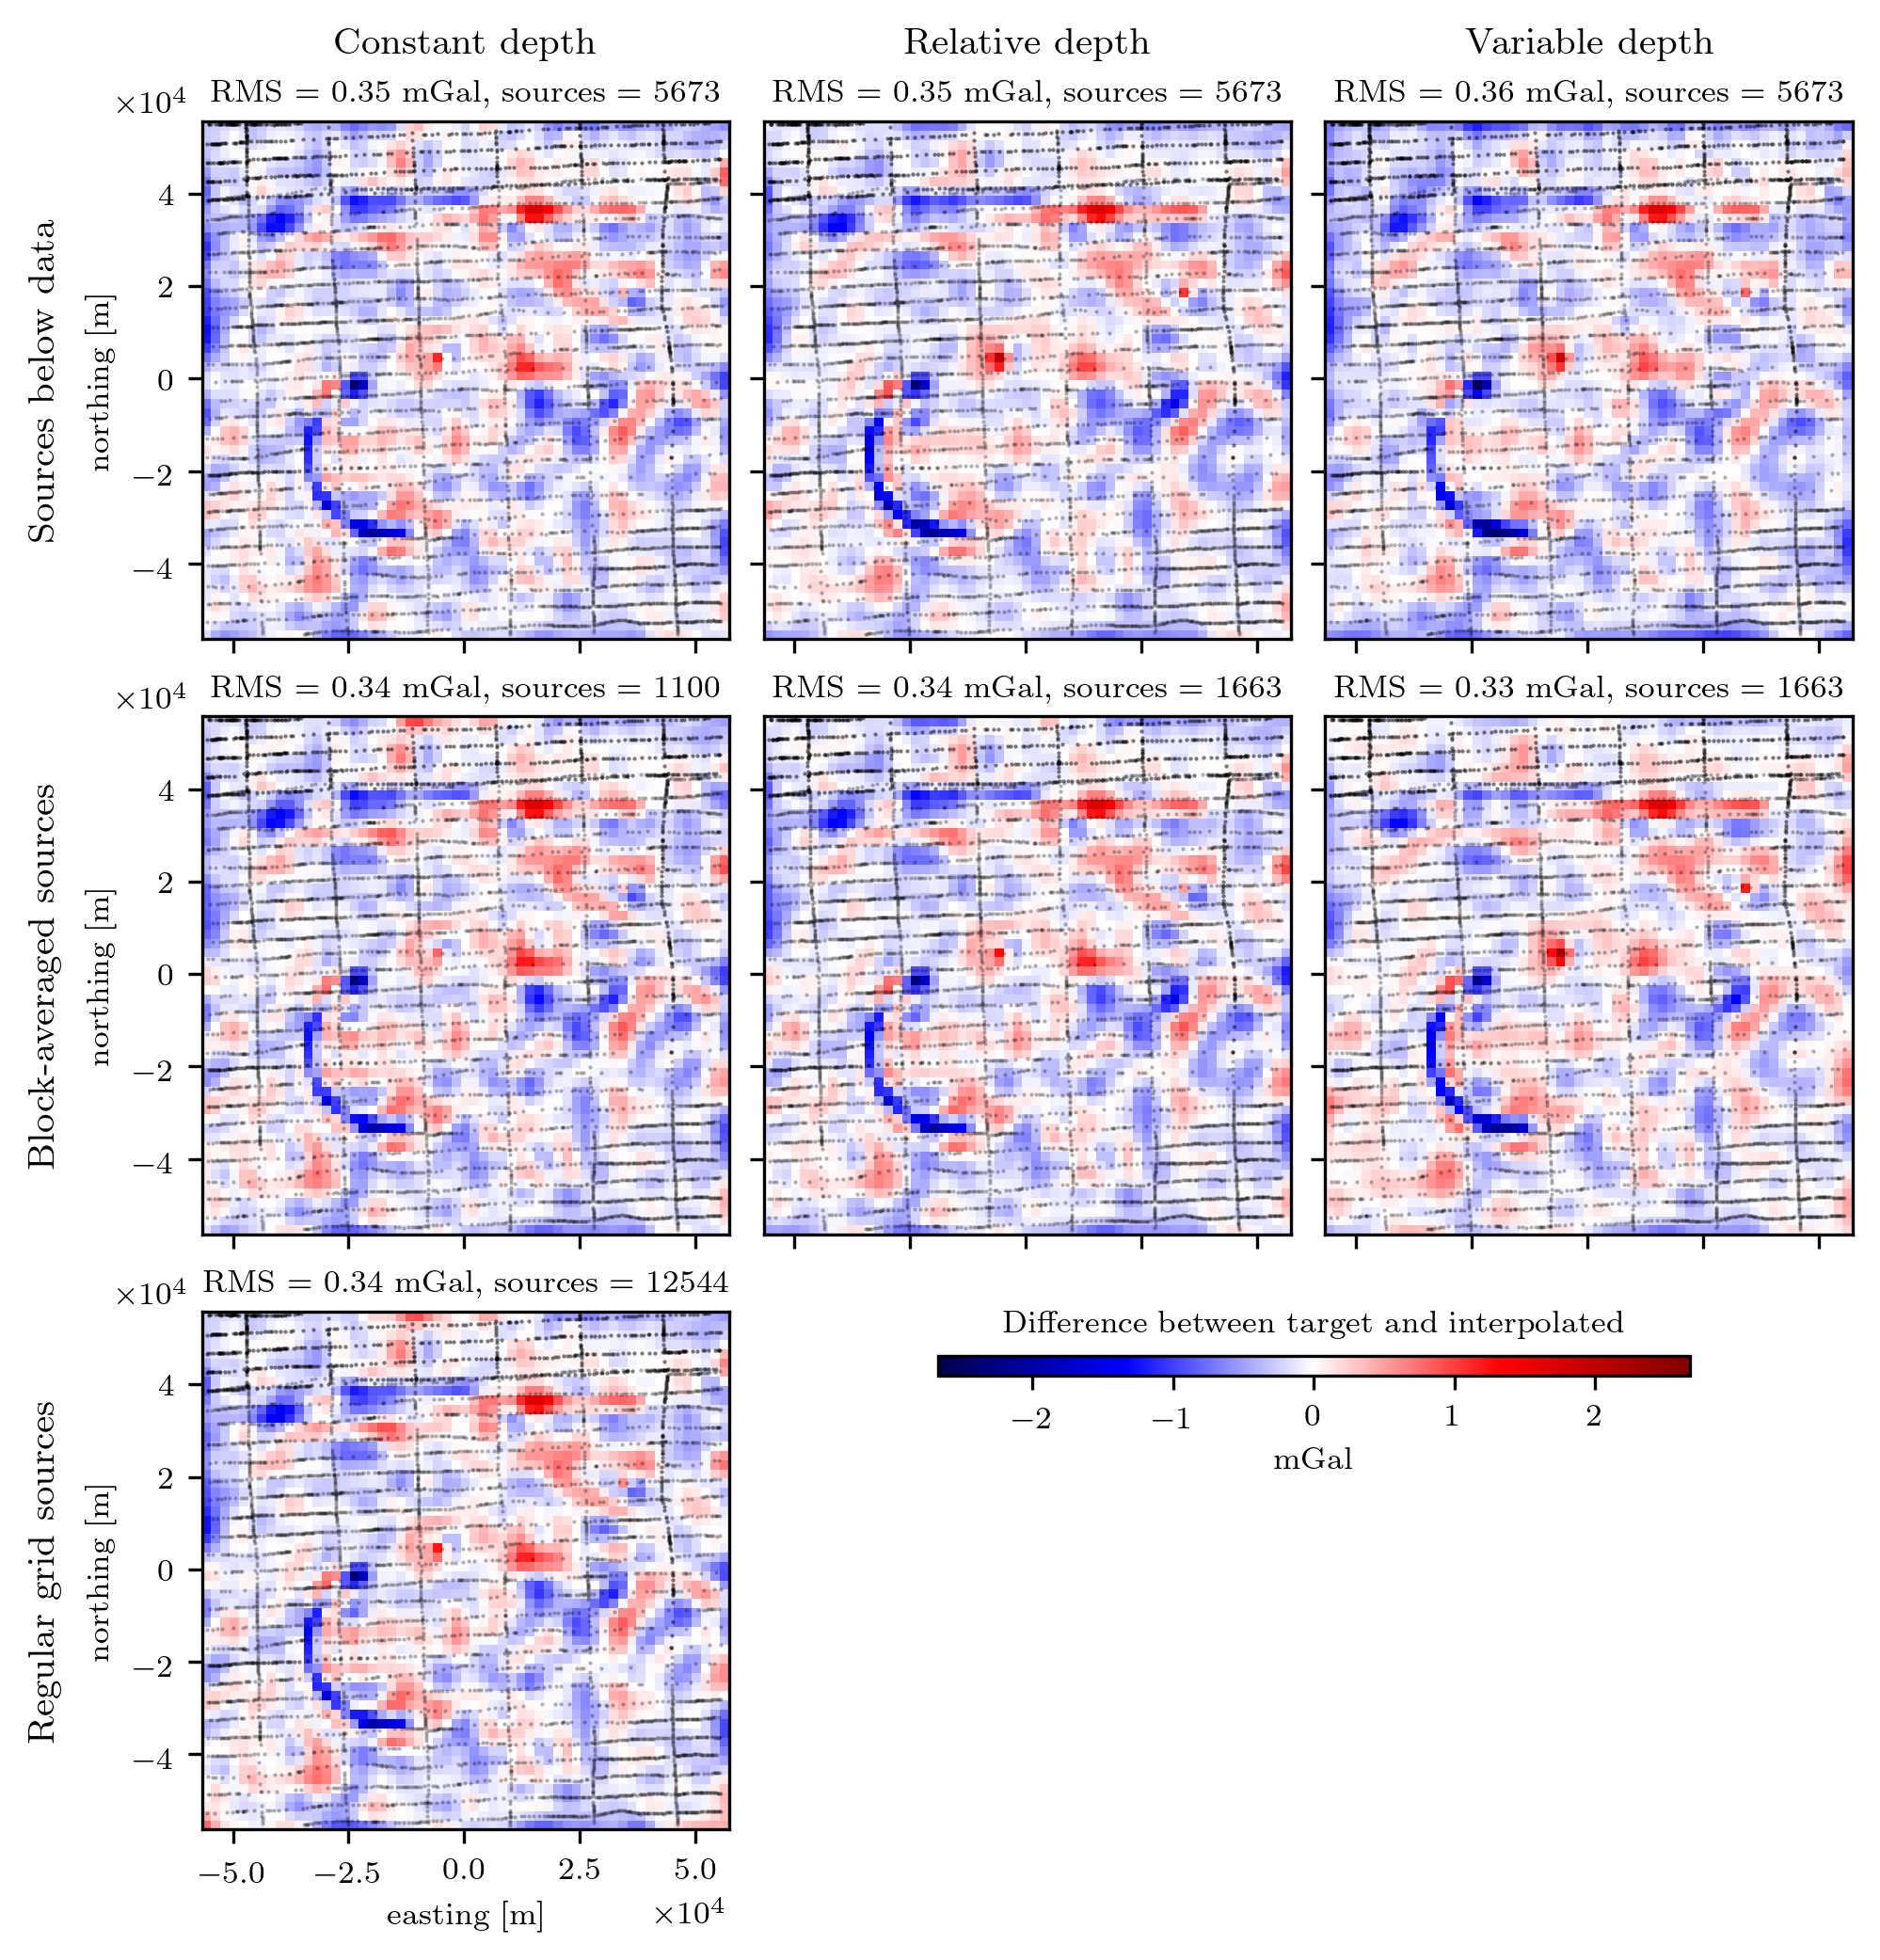

In [12]:
# We will use the same boundary value for each plot in order to
# show them with the same color scale.
vmax = vd.maxabs(
    *list(
        target - dataset[depth_type]
        for dataset in best_predictions
        for depth_type in dataset
    )
)

# Initialize figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(6.66, 6.9), sharex=True, sharey=True
)

# Plot the differences between the target and the best prediction for each layout
for i, (ax_row, dataset) in enumerate(zip(axes, best_predictions)):
    for j, (ax, depth_type) in enumerate(zip(ax_row, dataset)):
        prediction = dataset[depth_type]
        difference = target - prediction
        tmp = difference.plot.pcolormesh(
            ax=ax,
            vmin=-vmax,
            vmax=vmax,
            cmap="seismic",
            add_colorbar=False,
            rasterized=True,
        )
        ax.scatter(
            survey_airborne.easting,
            survey_airborne.northing,
            s=1,
            alpha=0.3,
            color="k",
            linewidths=0,
        )
        ax.set_aspect("equal")
        # Set scientific notation on axis labels (and change offset text position)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
        ax.yaxis.offsetText.set_x(-0.16)
        ax.set_xlabel(ax.get_xlabel() + " [m]")
        ax.set_ylabel(ax.get_ylabel() + " [m]")
        # Set title with RMS and number of points
        ax.set_title(
            r"RMS = {:.2f} mGal, sources = {}".format(
                prediction.rms, prediction.n_points
            ),
            fontsize="medium",
            horizontalalignment="center",
            pad=5,
        )

        # Annotate the columns of the figure
        if i == 0:
            ax.text(
                0.5,
                1.13,
                # r"\textbf{{" + depth_type.replace("_", " ").title() + r"}}",
                depth_type.replace("_", " ").capitalize(),
                fontsize="large",
                fontweight="bold",
                horizontalalignment="center",
                transform=ax.transAxes,
            )
        # Annotate the rows of the figure
        if j == 0:
            ax.text(
                -0.33,
                0.5,
                # r"\textbf{{" + layout_names[i] + r"}}",
                layout_names[i],
                fontsize="large",
                fontweight="bold",
                verticalalignment="center",
                rotation="vertical",
                transform=ax.transAxes,
            )
        # Remove xlabels and ylabels from inner axes
        if i != 2:
            ax.set_xlabel("")
        if j != 0:
            ax.set_ylabel("")

# Hide the last two axes because they are not used
axes[-1][-1].set_visible(False)
axes[-1][-2].set_visible(False)

# Add colorbar
# cbar_ax = fig.add_axes([0.39, 0.075, 0.01, 0.25])
# fig.colorbar(tmp, cax=cbar_ax, orientation="vertical", label=f"Difference between\ntarget and interpolation\n[{field_units}]")
cbar_ax = fig.add_axes([0.49, 0.3, 0.4, 0.01])
cbl = fig.colorbar(tmp, cax=cbar_ax, orientation="horizontal", label=f"{field_units}")
cbl.ax.set_title("Difference between target and interpolated", fontsize="medium")

plt.tight_layout(w_pad=0)
plt.savefig(
    figs_dir / "airborne_survey_differences.pdf",
    bbox_inches="tight",
)
plt.show()

# Gradient-boosted equivalent sources comparison

In [13]:
eql_harmonic_results = pd.read_csv(
    results_dir / "gradient-boosted" / "eql_harmonic.csv"
)

eql_rms = eql_harmonic_results.rms.values[0]
eql_residue = eql_harmonic_results.residue.values[0]
eql_fitting_time = eql_harmonic_results.fitting_time.values[0]

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
boost_window_size = pd.read_csv(
    results_dir / "gradient-boosted" / "gradient-boosted-window-size.csv",
)

In [15]:
boost_window_size

window_size  window_size_ratio       rms   rms_std  fitting_time  \
0       2000.0           0.017857  1.041016  0.031366      4.374248   
1       5000.0           0.044643  0.755033  0.030150      1.514687   
2      10000.0           0.089286  0.664755  0.027253      0.404387   
3      20000.0           0.178571  0.626497  0.025284      0.197949   
4      30000.0           0.267857  0.572311  0.038128      0.104877   
5      40000.0           0.357143  0.463346  0.029237      0.149632   
6      50000.0           0.446429  0.480085  0.038187      0.096667   
7      60000.0           0.535714  0.463802  0.034780      0.186018   
8      70000.0           0.625000  0.470805  0.041373      0.152061   

   fitting_time_std  
0          0.020731  
1          0.011334  
2          0.004960  
3          0.011649  
4          0.007864  
5          0.023319  
6          0.009850  
7          0.012145  
8          0.007475

In [16]:
boost_overlapping = pd.read_csv(
    results_dir / "gradient-boosted" / "gradient-boosted-overlapping.csv"
)

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
boost_overlapping

overlaps       rms   rms_std  fitting_time  fitting_time_std
0       0.00  0.932410  0.125921      0.049677          0.003951
1       0.05  0.932410  0.125921      0.050403          0.001583
2       0.10  0.932410  0.125921      0.048987          0.004373
3       0.15  0.932410  0.125921      0.048302          0.002887
4       0.20  0.932410  0.125921      0.048417          0.002927
5       0.25  0.655160  0.058210      0.071466          0.002542
6       0.30  0.655160  0.058210      0.072950          0.004306
7       0.35  0.655160  0.058210      0.073373          0.011924
8       0.40  0.598914  0.040354      0.081552          0.002053
9       0.45  0.572311  0.038128      0.100075          0.006134
10      0.50  0.572311  0.038128      0.101906          0.013763
11      0.55  0.519076  0.039269      0.141664          0.012480
12      0.60  0.454148  0.019755      0.169401          0.003971
13      0.65  0.470681  0.037479      0.224531          0.008550
14      0.70  0.442835  0.015058      0.278961          0.029699
15      0.75  0.410308  0.011085      0.383179          0.023594
16      0.80  0.388191  0.005573      0.586000          0.060860
17      0.85  0.377978  0.009238      0.993863          0.038878
18      0.90  0.365055  0.003382      2.301877          0.101502
19      0.95  0.351208  0.003145      8.078607          0.162551

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


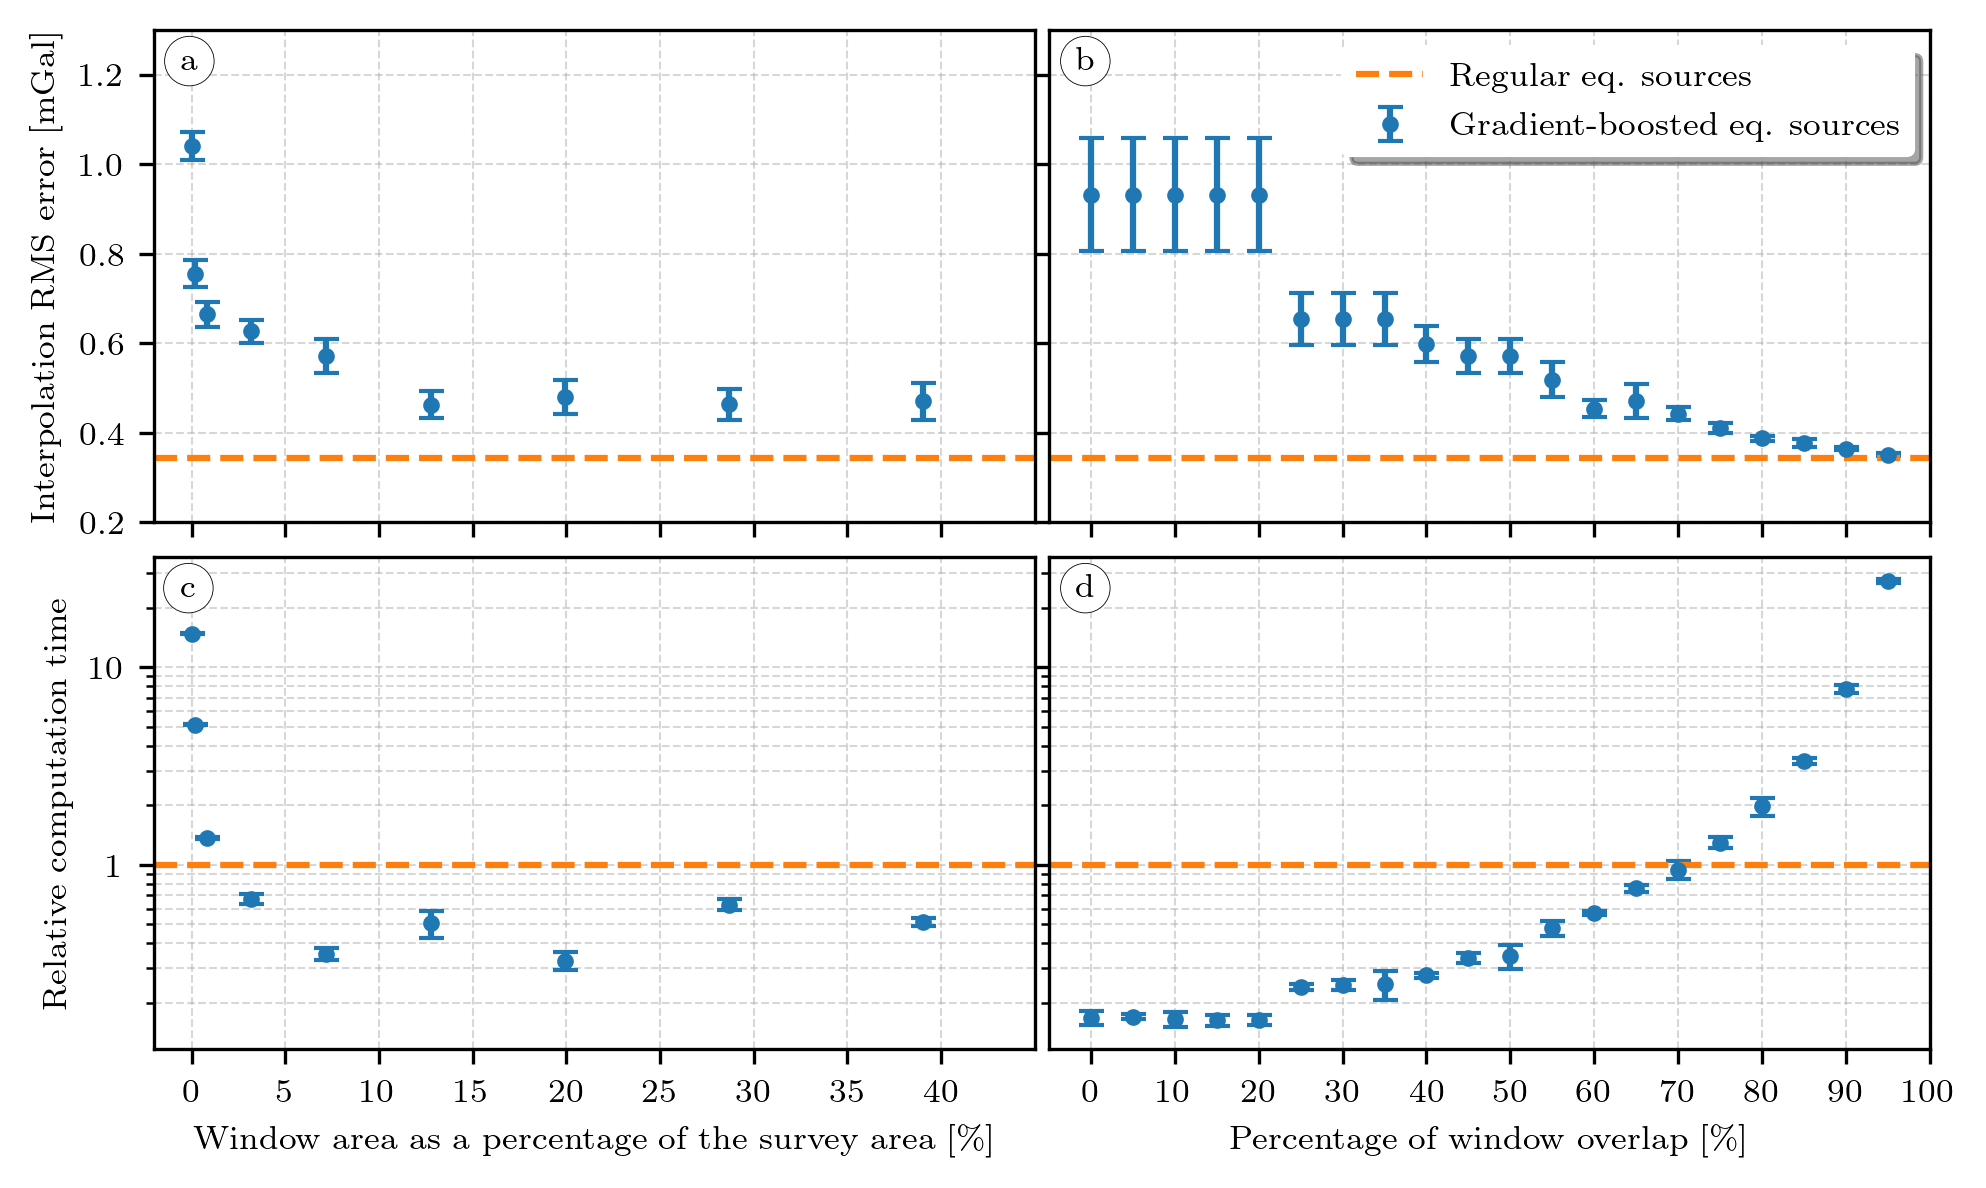

In [18]:
figsize = (6.66, 4)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize, sharex="col", sharey="row")


ax1, ax2 = axes[:, 0]

boosted = ax1.errorbar(
    boost_window_size.window_size_ratio ** 2 * 100,
    boost_window_size.rms,
    yerr=boost_window_size.rms_std,
    fmt=".",
    capsize=3,
)
nonboosted = ax1.axhline(eql_rms, linestyle="--", color="C1")
ax1.set_ylabel("Interpolation RMS error [mGal]")
ax1.set_ylim(0.2, 1.3)
ax1.set_xticks(np.arange(0, 45, 5))

ax2.errorbar(
    boost_window_size.window_size_ratio ** 2 * 100,
    boost_window_size.fitting_time / eql_fitting_time,
    yerr=boost_window_size.fitting_time_std / eql_fitting_time,
    fmt=".",
    capsize=3,
)
ax2.axhline(1, linestyle="--", color="C1")
ax2.set_xlabel("Window area as a percentage of the survey area [\\%]")
ax2.set_ylabel("Relative computation time")
ax2.set_yscale("log")
ax2.set_xlim(-2, 45)

ax1, ax2 = axes[:, 1]

ax1.errorbar(
    boost_overlapping.overlaps * 100,
    boost_overlapping.rms,
    yerr=boost_overlapping.rms_std,
    fmt=".",
    capsize=3,
)
ax1.axhline(eql_rms, linestyle="--", color="C1")

ax2.errorbar(
    boost_overlapping.overlaps * 100,
    boost_overlapping.fitting_time / eql_fitting_time,
    yerr=boost_overlapping.fitting_time_std / eql_fitting_time,
    fmt=".",
    capsize=3,
)
ax2.axhline(1, linestyle="--", color="C1")
ax2.set_xlabel("Percentage of window overlap [\\%]")
ax2.set_yscale("log")
ax2.set_xlim(-5, 100)
ax2.set_xticks(np.arange(0, 110, 10))
ax2.yaxis.set_major_formatter(StrMethodFormatter("{x:g}"))

axes[0, 1].legend(
    handles=(nonboosted, boosted),
    labels=("Regular eq. sources", "Gradient-boosted eq. sources"),
    loc="upper right",
    framealpha=1,
    edgecolor="white",
    shadow=True,
)

labels = "a b c d".split()
for ax, label in zip(axes.ravel(), labels):
    ax.annotate(
        label,
        xy=(0.03, 0.92),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )
    ax.grid(which="both", alpha=0.5, linestyle="--", linewidth=0.5)

plt.tight_layout(w_pad=0, h_pad=0.5)
plt.savefig(
    figs_dir / "gradient-boosted-comparisons.pdf",
    bbox_inches="tight",
)
plt.show()

## Australia gravity

In [19]:
australia_data = xr.open_dataset(results_dir / "australia" / "australia-data.nc")
australia_grid = xr.open_dataset(results_dir / "australia" / "australia-grid.nc")

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
region = vd.pad_region(
    vd.get_region((australia_data.longitude.values, australia_data.latitude.values)),
    1,
)
lat_ts = australia_data.latitude.mean().values
lon_ts = australia_data.longitude.mean().values

proj_gmt = "M{:.0f}/{:.0f}/5i".format(lon_ts, lat_ts)

In [21]:
maxabs = vd.maxabs(
    australia_data.disturbance.values,
    australia_grid.disturbance.values,
)

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


grdblend [NOTICE]: Remote data courtesy of GMT data server OCEANIA [https://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc minutes from Gaussian Cartesian filtering (1.9 km fullwidth) of SRTM15+V2.1 [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (earth_relief_01m_p): S60E090


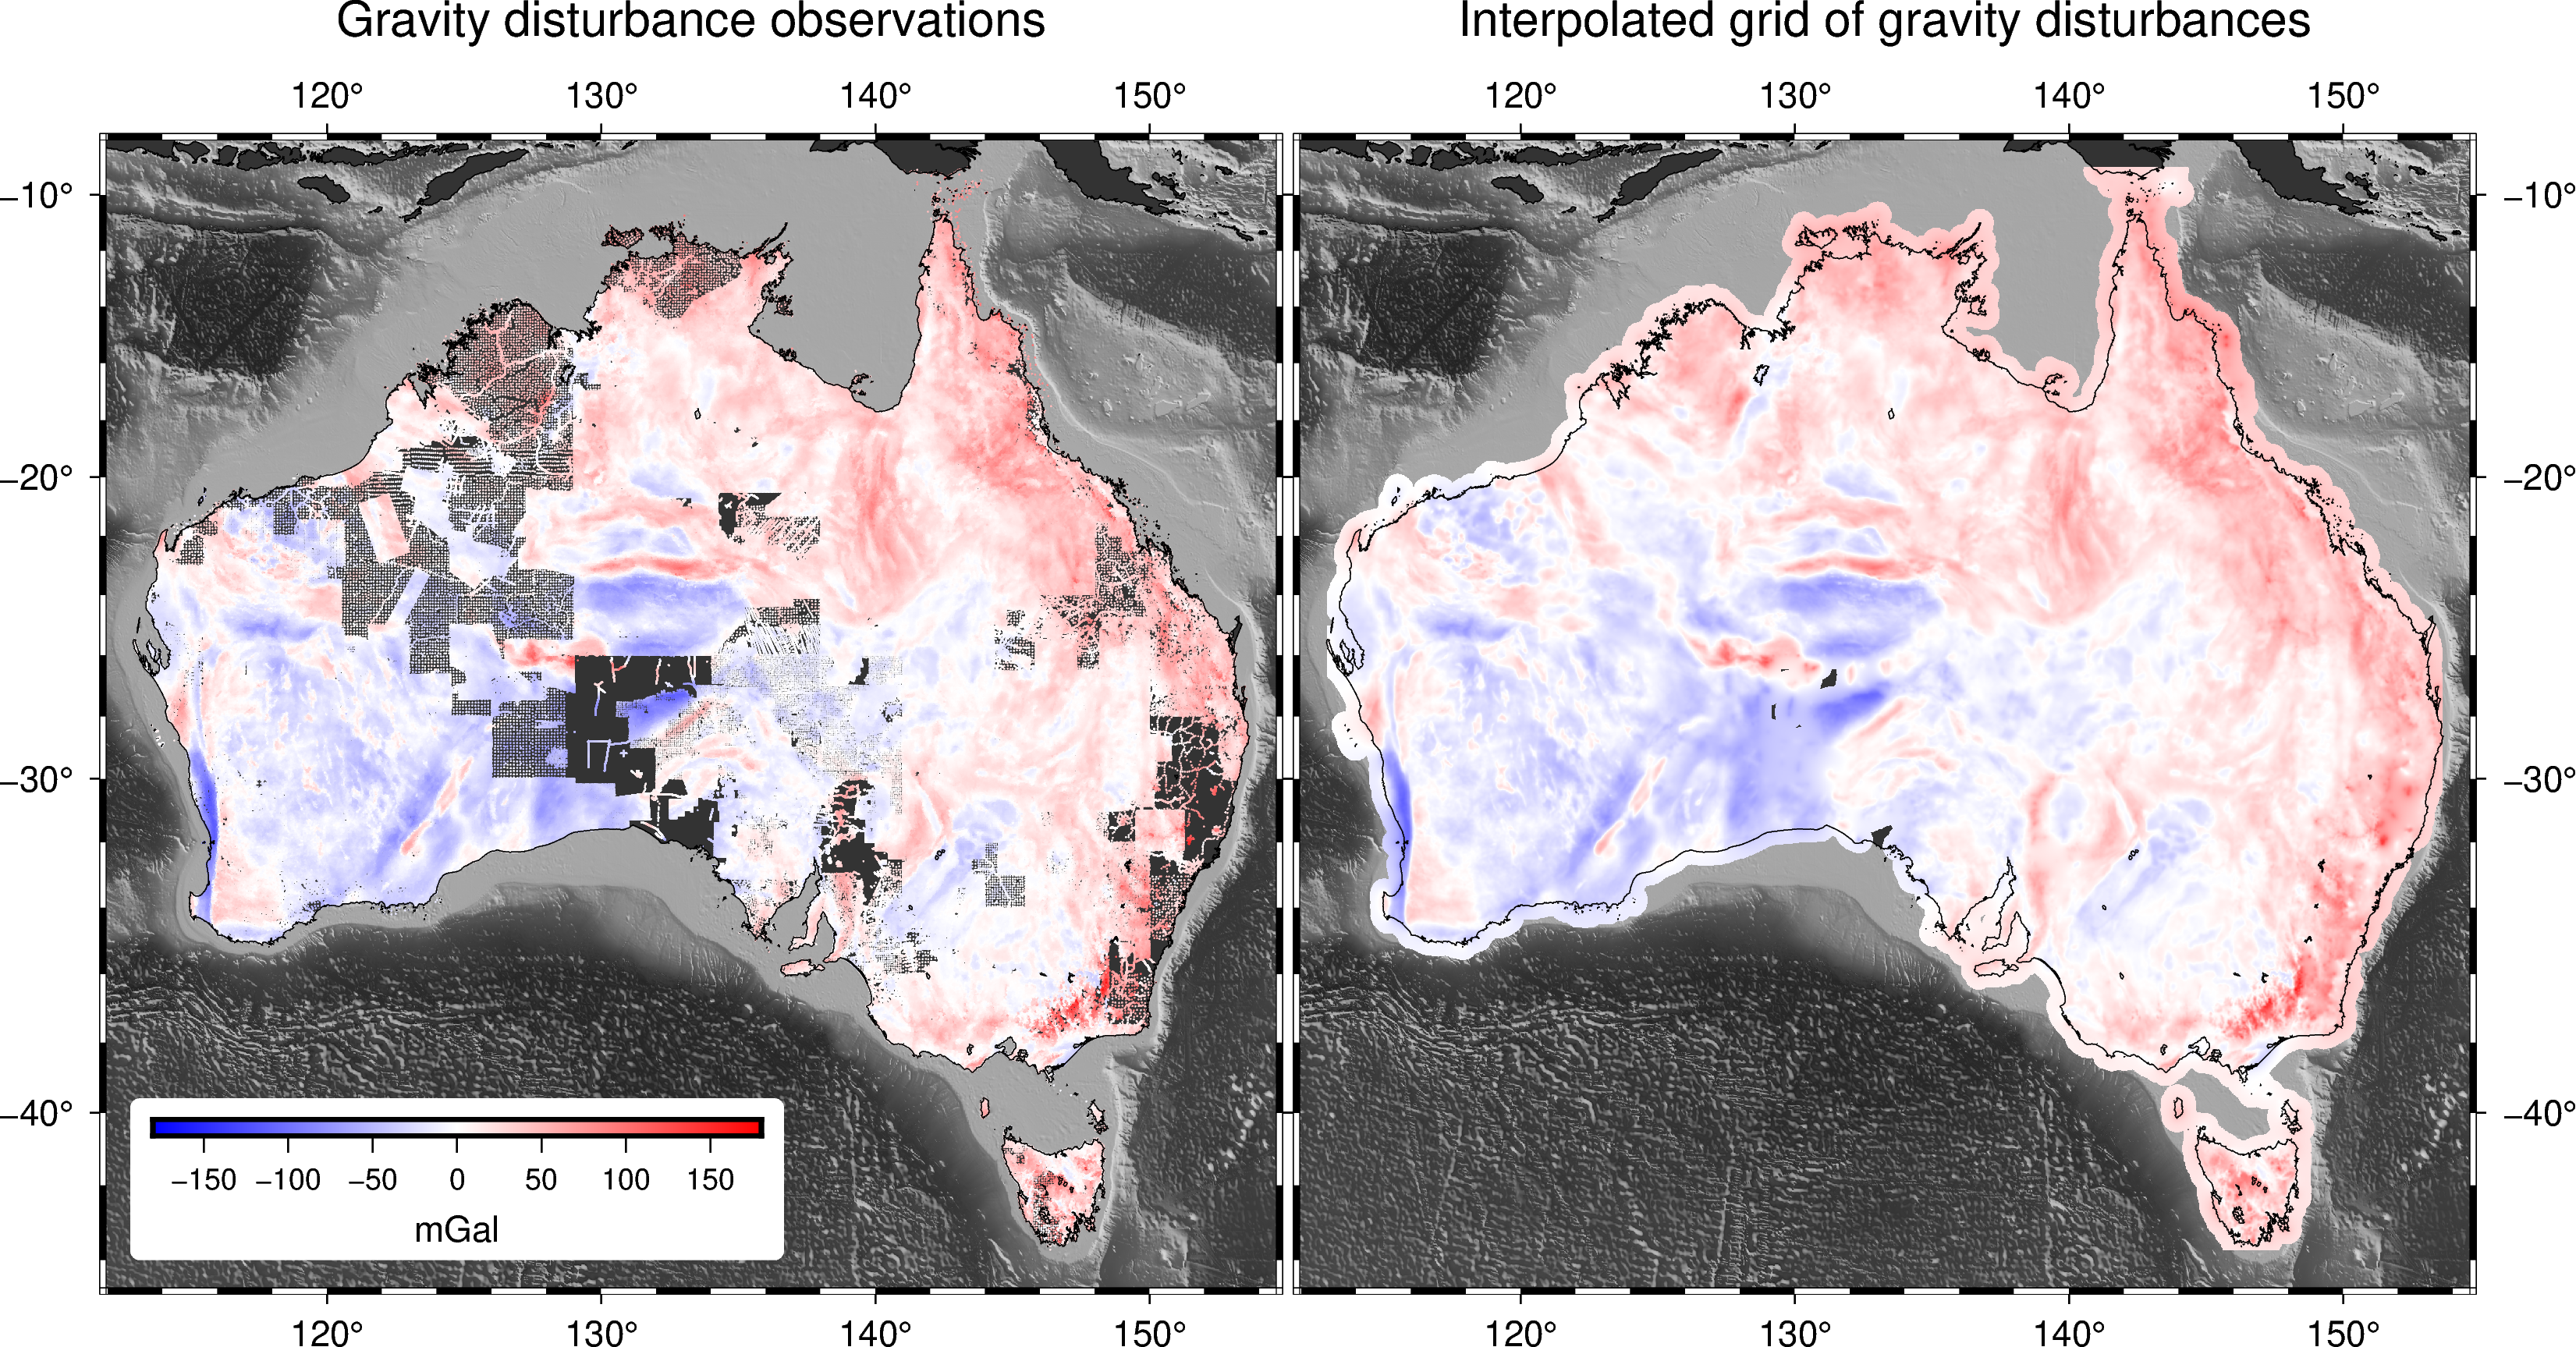

In [22]:
fig = pygmt.Figure()

pygmt.config(
    FONT_ANNOT="11p,Helvetica,black",
    FONT_TITLE="15p,Helvetica,black",
    FONT_LABEL="11p,Helvetica,black",
    MAP_FRAME_WIDTH="2p",
)

fig.grdimage(
    "@earth_relief_01m",
    region=region,
    projection=proj_gmt,
    shading="+a45+nt0.7",
    cmap="gray",
)
fig.coast(
    land="#333333",
)
pygmt.makecpt(cmap="polar", series=(-maxabs, maxabs))
fig.plot(
    x=australia_data.longitude,
    y=australia_data.latitude,
    color=australia_data.disturbance,
    style="c0.5p",
    cmap=True,
)
fig.coast(shorelines=True)
fig.basemap(frame=["af", 'WeSN+t"Gravity disturbance observations"'])
with pygmt.config(FONT_ANNOT="9p,Helvetica,black"):
    fig.colorbar(
        box="+gwhite+c-0.1c/0.2c+r0.1c",
        position="jBL+h+w2.6i/0.07i+o0.2i/0.65i",
        frame=['xa50+l"mGal"'],
    )

fig.shift_origin("5.1i", 0)

fig.grdimage(
    "@earth_relief_01m",
    region=region,
    projection=proj_gmt,
    shading="+a45+nt0.7",
    cmap="gray",
)
fig.coast(
    land="#333333",
)
pygmt.makecpt(cmap="polar", series=(-maxabs, maxabs))
fig.grdimage(
    australia_grid.disturbance,
    nan_transparent=True,
)
fig.coast(shorelines=True)
fig.basemap(frame=["af", 'wESN+t"Interpolated grid of gravity disturbances"'])

fig.savefig(figs_dir / "australia.png")
fig.show(width=900)